In [1]:
# Sources/tools used in this file:
# - GitHub Copilot
# - https://pypi.org/project/matplotlib-venn/

import pandas as pd

daigt_v4_data = pd.read_csv("data/daigt_v4.csv")
ai_vs_human_data = pd.read_csv("data/ai_vs_human.csv")
detect_ai_data = pd.read_csv("data/detect_ai.csv")

In [2]:
print("DAIGT V4 data head:")
print(daigt_v4_data.head())
print("\n\nAI vs Human data head:")
print(ai_vs_human_data.head())
print("\n\nDetect AI data head:")
print(detect_ai_data.head())

DAIGT V4 data head:
                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

          prompt_name           source  RDizzl3_seven  model  
0  Phones and driving  persuade_corpus          False  human  
1  Phones and driving  persuade_corpus          False  human  
2  Phones and driving  persuade_corpus          False  human  
3  Phones and driving  persuade_corpus          False  human  
4  Phones and driving  persuade_corpus          False  human  


AI vs Human data head:
                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "Am

In [3]:
print(f"DAIGT V4 entries: {len(daigt_v4_data)}")
print(f"AI vs Human entries: {len(ai_vs_human_data)}")
print(f"Detect AI entries: {len(detect_ai_data)}")

DAIGT V4 entries: 73573
AI vs Human entries: 487235
Detect AI entries: 165767


In [4]:
daigt_v4_duplicates = daigt_v4_data.duplicated().any()
print(f"DAIGT V4 contains duplicates: {daigt_v4_duplicates}")

ai_vs_human_duplicates = ai_vs_human_data.duplicated().any()
print(f"AI vs Human contains duplicates: {ai_vs_human_duplicates}")

detect_ai_duplicates = detect_ai_data.duplicated().any()
print(f"Detect AI contains duplicates: {detect_ai_duplicates}")


DAIGT V4 contains duplicates: False
AI vs Human contains duplicates: False
Detect AI contains duplicates: False


Venn diagram of all entries in all three datasets:


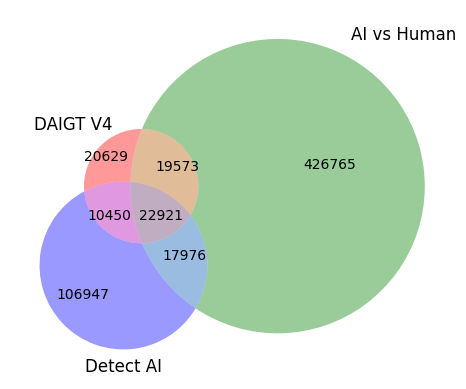

In [5]:
from matplotlib_venn import venn3

# Relative sizes of the datasets and intersections of entries

daigt_v4_data_set = set(daigt_v4_data['text'])
ai_vs_human_data_set = set(ai_vs_human_data['text'])
detect_ai_data_set = set(detect_ai_data['text'])

print("Venn diagram of all entries in all three datasets:")
venn3([daigt_v4_data_set, ai_vs_human_data_set, detect_ai_data_set], ('DAIGT V4', 'AI vs Human', 'Detect AI'))


In [6]:
# Exploring what prompt types there are in DAIGT V4 and Detect AI datasets

daigt_v4_prompts = daigt_v4_data['prompt_name'].unique()
print("DAIGT V4 prompts:")
for prompt in daigt_v4_prompts:
    print(prompt)

detect_ai_prompts = detect_ai_data['prompt_id'].unique()
print("\nDetect AI prompts:")
for prompt in detect_ai_prompts:
    print(prompt)

DAIGT V4 prompts:
Phones and driving
Car-free cities
Summer projects
"A Cowboy Who Rode the Waves"
Mandatory extracurricular activities
Exploring Venus
Facial action coding system
The Face on Mars
Community service
Grades for extracurricular activities
Driverless cars
Does the electoral college work?
Cell phones at school
Distance learning
Seeking multiple opinions

Detect AI prompts:
0
1
3
6
5
2
4
14
8
10
13
9
11
7
12
100
102
103


In [7]:
# Checking samples of prompts in the DAIGT V4

daigt_v4_prompt_0 = daigt_v4_data[daigt_v4_data["prompt_name"] == "Phones and driving"].sample(3)
daigt_v4_prompt_1 = daigt_v4_data[daigt_v4_data["prompt_name"] == "The Face on Mars"].sample(3)
daigt_v4_prompt_2 = daigt_v4_data[daigt_v4_data["prompt_name"] == "Does the electoral college work?"].sample(3)
daigt_v4_prompt_3 = daigt_v4_data[daigt_v4_data["prompt_name"] == "Cell phones at school"].sample(3)


for index, row in daigt_v4_prompt_0.iterrows():
    print(f"\nPrompt 0 sample: \n{row['text'][:200]}")

for index, row in daigt_v4_prompt_1.iterrows():
    print(f"\nPrompt 1 sample: \n{row['text'][:200]}")

for index, row in daigt_v4_prompt_2.iterrows():
    print(f"\nPrompt 2 sample: \n{row['text'][:200]}")

for index, row in daigt_v4_prompt_3.iterrows():
    print(f"\nPrompt 3 sample: \n{row['text'][:200]}")


Prompt 0 sample: 
A debate has raged over the safety implications and regulatory allowances surrounding the use of cell phones while driving. Although times have changed since cell phones were first introduced and the 

Prompt 0 sample: 
Cell phones are a necessary tool for modern communication, but they can also create dangerous distractions for drivers while operating a vehicle. There is a strong argument that drivers should not be 

Prompt 0 sample: 
No Phones While Driving

Smartphones, The devices of the future. With Phones you can: call people, watch movies, FaceTime, and much more. They have had a big impact on society and how we communicate. 

Prompt 1 sample: 
The ¨Face" on Mars is a mere coincidence. There are many formations like this one on earth. When using the Mars Global Survey spacecraft it´s high resolution camera picked up no signs of any type of a

Prompt 1 sample: 
There has been a large argument about the "Face on Mars". This "Face on Mars" is located in a region 

Number of texts written by humans: 27370
Number of texts generated by LLMs: 46203


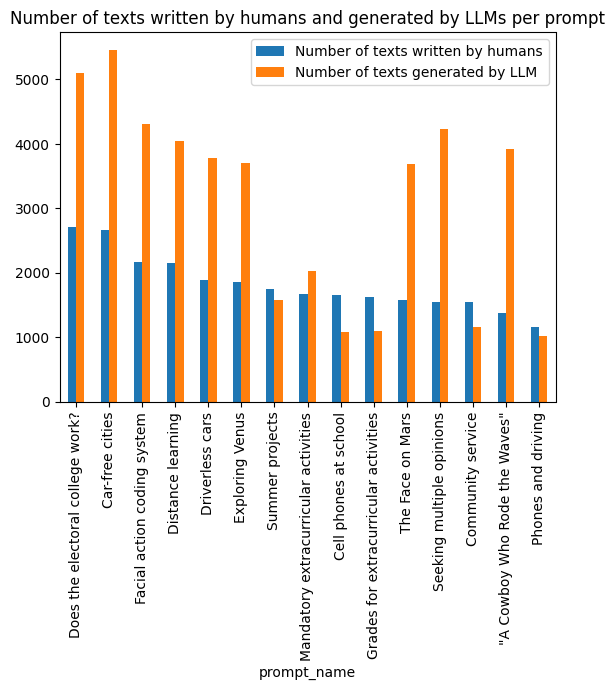

In [8]:
import matplotlib.pyplot as plt


daigt_v4_label_0_data = daigt_v4_data[daigt_v4_data["label"] == 0]
daigt_v4_label_1_data = daigt_v4_data[daigt_v4_data["label"] == 1]

print(f"Number of texts written by humans: {len(daigt_v4_label_0_data)}")
print(f"Number of texts generated by LLMs: {len(daigt_v4_label_1_data)}")

combined_data = pd.concat([daigt_v4_label_0_data["prompt_name"].value_counts(), daigt_v4_label_1_data["prompt_name"].value_counts()], axis=1)
combined_data.columns = ["Number of texts written by humans", "Number of texts generated by LLM"]

combined_data.plot(kind="bar", title="Number of texts written by humans and generated by LLMs per prompt")
plt.show()